# Curso Computer Vision

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## 1) Introducción a OpenCV para Análisis de CCTV

**Objetivo:**  
Configurar OpenCV y aprender a cargar y visualizar imágenes y video provenientes de sistemas CCTV.

In [ ]:
#!pip install opencv-python matplotlib

In [1]:
import cv2
import matplotlib.pyplot as plt

**1.1) Cargar 1 imagen**

Ruta de la imagen capturada por una cámara CCTV

In [2]:
image_path = "./data/cctv_image.jpg"
image = cv2.imread(image_path)

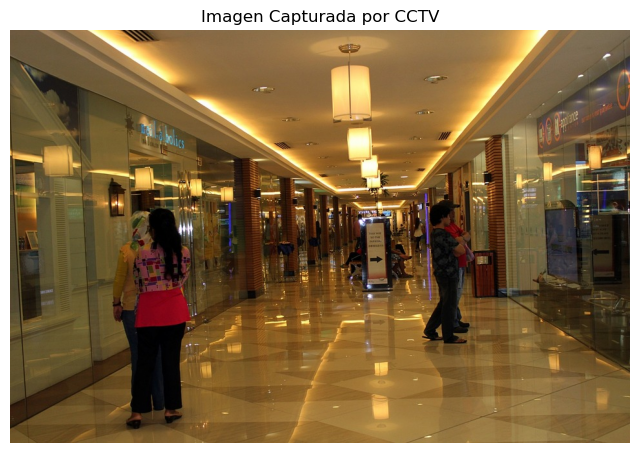

In [3]:
# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Mostrar la imagen usando matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Imagen Capturada por CCTV")
    plt.axis("off")
    plt.show()

**1.2) Captura y visualización de video en tiempo real**

In [7]:
# Abrir la cámara web
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
else:
    while True:
        # Capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo leer el frame.")
            break

        # Mostrar el frame en una ventana llamada 'Frame de CCTV'
        cv2.imshow("Frame de CCTV", frame)

        # Esperar 1 ms para detectar si se ha presionado la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar el objeto de captura y cerrar todas las ventanas
    cap.release()
    cv2.destroyAllWindows()

**1.3) Cargar un video**

In [5]:
# Path video
path_video = "./data/store-aisle-detection.mp4"

# Cargar video
cap = cv2.VideoCapture(path_video)

if not cap.isOpened():
    print("Error: No se pudo abrir la cámara.")
else:
    while True:
        # Capturar frame por frame
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo leer el frame.")
            break

        # Mostrar el frame en una ventana llamada 'Frame de CCTV'
        cv2.imshow("Frame de CCTV", frame)

        # Esperar 1 ms para detectar si se ha presionado la tecla 'q' para salir
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Liberar el objeto de captura y cerrar todas las ventanas
    cap.release()
    cv2.destroyAllWindows()

Error: No se pudo abrir la cámara.


## 2) Técnicas de Mejora, Corrección y Anotación de Imágenes

**Objetivo:**  
Optimizar la calidad visual de las imágenes capturadas por cámaras de CCTV y aplicar anotaciones que faciliten la identificación de eventos críticos.

**2.1) Ajuste de brillo y contraste**

In [8]:
# Cargar la imagen de CCTV
image_path = "./data/cctv_image.jpg"
image = cv2.imread(image_path)
if image is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

# Ajuste de brillo y contraste: new_image = image * alpha + beta
alpha = 1.2  # Factor de contraste (mayor a 1 aumenta contraste)
beta = 30    # Valor de brillo (positivo aumenta el brillo)
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

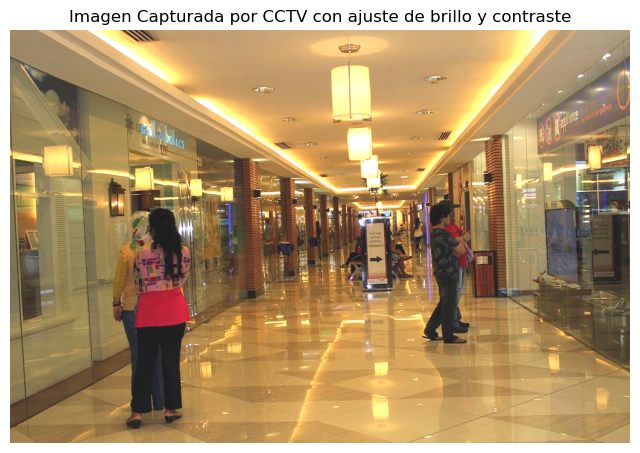

In [9]:
# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(adjusted)
plt.title("Imagen Capturada por CCTV con ajuste de brillo y contraste")
plt.axis("off")
plt.show()

In [10]:
# Guardar imagen para comparar
output_file = "./data/cctv_image_con_correcciones.jpg"
cv2.imwrite(output_file, adjusted)

True

**2.2) Corrección de color y normalización**

In [11]:
import numpy as np

El espacio de color HSV (Hue, Saturation, Value) representa los colores según su matiz, saturación y valor. 
<br>Convertir una imagen a HSV facilita la manipulación de la saturación, permitiendo ajustar la intensidad o pureza de los colores sin afectar el brillo o el tono.

In [12]:
# Convertir la imagen ajustada a espacio HSV para modificar la saturación
hsv = cv2.cvtColor(adjusted, cv2.COLOR_BGR2HSV)

In [13]:
h, s, v = cv2.split(hsv)

# Aumentar la saturación
saturacion = 5

s = cv2.multiply(s, saturacion)  
s = np.clip(s, 0, 255).astype(np.uint8)
hsv_adjusted = cv2.merge([h, s, v])
color_corrected = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2BGR)

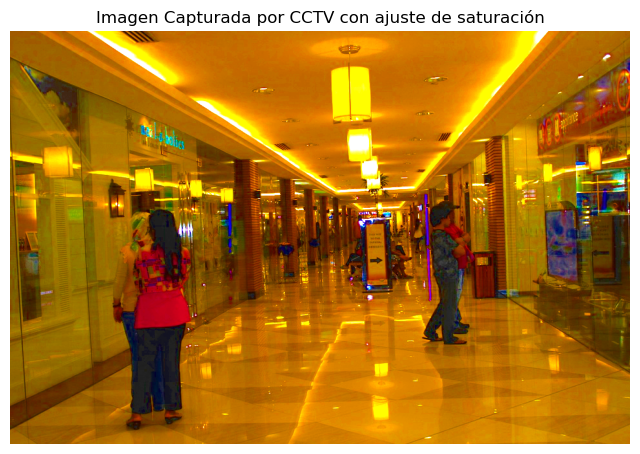

In [14]:
# Mostrar la imagen usando matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(color_corrected)
plt.title("Imagen Capturada por CCTV con ajuste de saturación")
plt.axis("off")
plt.show()

In [15]:
# Convertir la imagen de BGR (formato OpenCV) a RGB (formato matplotlib)
color_corrected = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)

# Guardar imagen para comparar
output_file = "./data/cctv_image_con_ajuste_saturacion.jpg"
cv2.imwrite(output_file, color_corrected)

True

**2.3) Aplicación de anotaciones**

In [16]:
# Hacer una copia de una imagen ya cargada
annotated = image.copy()

# Dibujar una línea: desde (150,250) hasta (350,250) en azul BGR: (255, 0, 0) con grosor de línea 3 píxeles
cv2.line(annotated, (150, 250), (350, 250), (255, 0, 0), 3)
# Dibujar un rectángulo: esquina superior izquierda (150, 300), inferior derecha (350,600) en verde BGR: (0, 255, 0)
cv2.rectangle(annotated, (150, 300), (350, 600), (0, 255, 0), 3)
# Escribir texto: 'Persona' en rojo BGR: (0, 0, 255), ubicado en (200,290)
cv2.putText(annotated, 'Persona', (200, 290), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

array([[[ 64,  89, 109],
        [ 63,  88, 108],
        [ 61,  86, 106],
        ...,
        [ 81, 103, 115],
        [ 82, 104, 116],
        [ 83, 105, 117]],

       [[ 65,  90, 110],
        [ 64,  89, 109],
        [ 62,  87, 107],
        ...,
        [ 84, 106, 118],
        [ 83, 105, 117],
        [ 83, 105, 117]],

       [[ 66,  91, 111],
        [ 65,  90, 110],
        [ 63,  88, 108],
        ...,
        [ 86, 107, 122],
        [ 83, 104, 119],
        [ 82, 103, 118]],

       ...,

       [[ 38,  83, 110],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 56, 103, 134],
        [ 57, 104, 135],
        [ 58, 105, 136]],

       [[ 39,  84, 111],
        [ 38,  83, 110],
        [ 38,  83, 110],
        ...,
        [ 55, 105, 135],
        [ 55, 104, 136],
        [ 57, 106, 138]],

       [[ 39,  84, 111],
        [ 39,  84, 111],
        [ 38,  83, 110],
        ...,
        [ 54, 104, 134],
        [ 55, 103, 137],
        [ 57, 108, 140]]

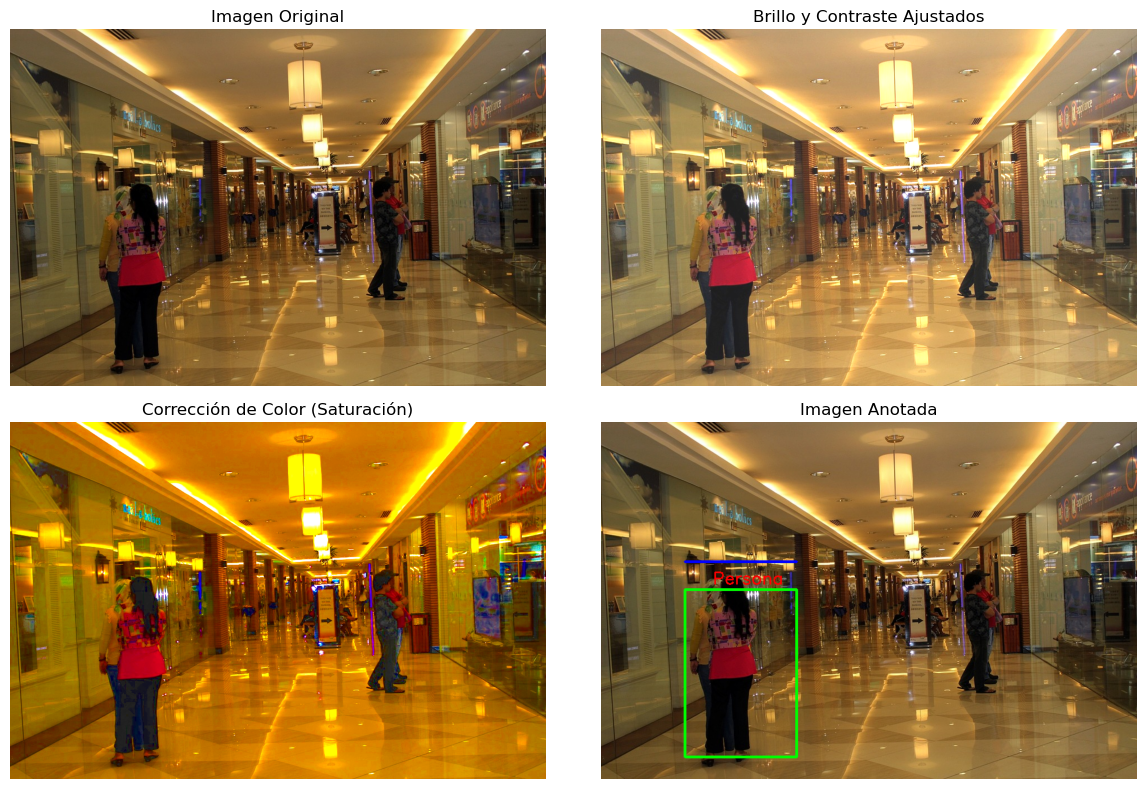

In [17]:
# Convertir de BGR a RGB para visualizar con matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_rgb = adjusted
color_corrected_rgb = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(adjusted_rgb)
plt.title("Brillo y Contraste Ajustados")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(color_corrected_rgb)
plt.title("Corrección de Color (Saturación)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(annotated_rgb)
plt.title("Imagen Anotada")
plt.axis("off")

plt.tight_layout()
plt.show()